In [63]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
sympy.init_printing()
%matplotlib inline

In [2]:
tau, zeta, t, w, K = sympy.symbols('tau, zeta, t, w, K', real=True, positive=True)
s = sympy.Symbol('s')

In [3]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

This is the standard form for the second order system transfer function

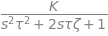

In [4]:
G = K/(tau**2*s**2 + 2*tau*zeta*s + 1)
G

In recent versions of Sympy, we can solve for the step response directly.

In [5]:
sympy.__version__

'1.5.1'

In [6]:
H = invL(G/s)

That's a really hairy expression, so let's try to simplify.

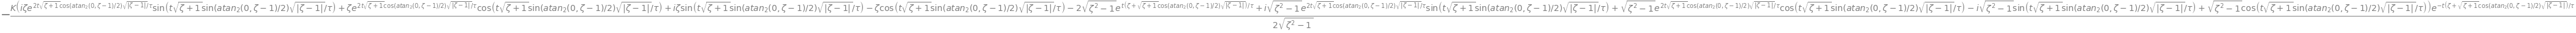

In [7]:
H.simplify()

The characteristic equation is the denominator of the transfer function

In [8]:
ce = sympy.Eq(sympy.denom(G), 0)
ce

In [9]:
roots = sympy.roots(ce, s)
roots

The shape of the inverse Laplace depends on the nature of the roots, which depends on the value of $\zeta$

Overdamped: $\zeta>1$. Two distinct real roots

In [10]:
invL(G.subs({zeta: 7})).simplify().expand()

Critically damped: $\zeta=1$. Repeated roots.

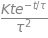

In [11]:
invL(G.subs({zeta: 1}))

Underdamped: $0<\zeta<1$: a complex conjugate pair of roots

In [12]:
r = invL(G.subs({zeta: 0.7}))
r

We can get prettier results if we use `Rational`s instead of `floats`

In [13]:
r = invL(G.subs({zeta: sympy.Rational(1, 2)}))
r

In [21]:
from ipywidgets import interact

In [82]:
def secondorder(K_in, tau_in, zeta_in, tmax):
    values = {K: sympy.nsimplify(K_in), tau: sympy.nsimplify(tau_in), zeta: sympy.nsimplify(zeta_in)}
    stepresponse = sympy.re(invL(G.subs(values)/s))
    sympy.plot(stepresponse, (t, 0, tmax), ylim = [0, 10])
    roots = sympy.roots(sympy.denom(G.subs(values)), s)
    root = np.array(list(roots))
    X = [sympy.re(x) for x in root]
    Y = [sympy.im(x) for x in root]
    plt.scatter(X,Y)
    plt.plot([0,0],[-1,1],'k-')
    plt.plot([-1,1],[0,0],'k-')
    plt.show()

In [83]:
interact(secondorder, K_in=(0, 10.), tau_in=(0., 10.), zeta_in=(0., 2), tmax=(30., 100));

interactive(children=(FloatSlider(value=5.0, description='K_in', max=10.0), FloatSlider(value=5.0, description…